#  **Hotel Cancel Culture: Who Will Cancel?** 🏨

**Who?**
>* 🏢 **Revenue Management (RM) teams** for hotel groups (corporate, franchise)
>
>
>* 🏨 On-site GMs, Sales, and Ops teams

**Why?**
>* 💰 **Revenue Management:** 
>  * Revenue optimization: Right price, right time, right customer
>    * Dynamic pricing
>    * Distribution channels
>    * Pricing per room type
>
>
>* 🤝 **Sales:**
>  * Group sales (pickup/wash)
>  * BT (performance/company for both GPP and LNR rates)
>
>
>* 🛌 **Rooms Ops:**
>  * Forecasting occupancy, arrivals, departures, stay-overs, same-day booking demand, and probability of guest relocation in the case of oversell.
>  * Determining staff schedules and periods of high demand
>
>
>* 🍰 ☕ **Food and Beverage:**
>  * Ordering food/supplies overall
>  * Scheduling staff
>  * Determining busy times (breakfast, lunch, dinner)
>    * Staffing, specific food/supplies

**What?**
>* 🧾 Dataset comprised of... 
>  * 32 different features
>    * Detailed explanation of features (and sub-categories, when appropriate) available in Readme
>  * Nearly 120,000 reservation records
>  * Source cited in Readme

❌ **How?**
>* Which models/methods? 
>* Data prep and feature engineering

**Goal:** determine whether or not a reservation would cancel given different details of a guest and their reservation.

his dataset contain information of hotel booking, We will perform exploratory data analysis to get insight from the data.

We will try to analyze the important factors that governs the bookings in the following steps:

1. We will try to find out  the **Total number of Hotel Bookings that were get  Cancelled.**
2. Then we will find the **Booking Ratio between Resort Hotel and City Hotel.**
3. Now We will find **Hotel Booking Pecentage for Each Year.**
4. After all of these We'll try to get **Most busiest month for the Hotel.**
5. Find out the **Country From which we get Most number of guests.**
6. We will try to get for **How Long People Stay in the hotel.**
7. At last will try to get the **Most booked accommodation type (Single, Couple, Family/Friends).**


# 📂 **Imports**

In [1]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Handling

from scipy import stats

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl

# Modeling - SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor

# %load_ext autoreload
# %autoreload 2

import hotel_data_functions.functions as hdf

# from sklearn.naive_bayes import MultinomialNB # for naive bayes model

# Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

from sklearn import set_config
set_config(display='diagram')

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [4]:
#find out size of data
df.shape

(119390, 32)

In [5]:
df.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,"119,390.00","119,390.00","119,390.00",119390,"119,390.00","119,390.00","119,390.00","119,390.00","119,390.00","119,386.00","119,390.00",119390,118902,119390,119390,"119,390.00","119,390.00","119,390.00",119390,119390,"119,390.00",119390,"103,050.00","6,797.00","119,390.00",119390,"119,390.00","119,390.00","119,390.00",119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.37,104.01,"2,016.16",NaN,27.17,15.80,0.93,2.50,1.86,0.10,0.01,NaN,NaN,NaN,NaN,0.03,0.09,0.14,NaN,NaN,0.22,NaN,86.69,189.27,2.32,NaN,101.83,0.06,0.57,NaN,NaN
std,NaN,0.48,106.86,0.71,NaN,13.61,8.78,1.00,1.91,0.58,0.40,0.10,NaN,NaN,NaN,NaN,0.18,0.84,1.50,NaN,NaN,0.65,NaN,110.77,131.66,17.59,NaN,50.54,0.25,0.79,NaN,NaN
min,NaN,0.00,0.00,"2,015.00",NaN,1.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,0.00,NaN,1.00,6.00,0.00,NaN,-6.38,0.00,0.00,NaN,NaN
25%,NaN,0.00,18.00,"2,016.00",NaN,16.00,8.00,0.00,1.00,2.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,0.00,NaN,9.00,62.00,0.00,NaN,69.29,0.00,0.00,NaN,NaN
50%,NaN,0.00,69.00,"2,016.00",NaN,28.00,16.00,1.00,2.00,2.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,0.00,NaN,14.00,179.00,0.00,NaN,94.58,0.00,0.00,NaN,NaN
75%,NaN,1.00,160.00,"2,017.00",NaN,38.00,23.00,2.00,3.00,2.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,0.00,NaN,229.00,270.00,0.00,NaN,126.00,0.00,1.00,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
hdf.report_df(df)

(119390, 32)


,datatypes,num_unique,null_sum,null_pct,count,mean,std,min,25%,50%,75%,max
hotel,object,2,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,int64,2,0,0.00,"119,390.00",0.37,0.48,0.00,0.00,0.00,1.00,1.00
lead_time,int64,479,0,0.00,"119,390.00",104.01,106.86,0.00,18.00,69.00,160.00,737.00
arrival_date_year,int64,3,0,0.00,"119,390.00","2,016.16",0.71,"2,015.00","2,016.00","2,016.00","2,017.00","2,017.00"
arrival_date_month,object,12,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,int64,53,0,0.00,"119,390.00",27.17,13.61,1.00,16.00,28.00,38.00,53.00
arrival_date_day_of_month,int64,31,0,0.00,"119,390.00",15.80,8.78,1.00,8.00,16.00,23.00,31.00
stays_in_weekend_nights,int64,17,0,0.00,"119,390.00",0.93,1.00,0.00,0.00,1.00,2.00,19.00
stays_in_week_nights,int64,35,0,0.00,"119,390.00",2.50,1.91,0.00,1.00,2.00,3.00,50.00
adults,int64,14,0,0.00,"119,390.00",1.86,0.58,0.00,2.00,2.00,2.00,55.00


# 🧼 **Starting Cleaning and EDA**

In [9]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    
    plt.show()

In [10]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

## **1 .Now We'll try to get busiest month for the Hotels**

Text(0, 0.5, 'Count')

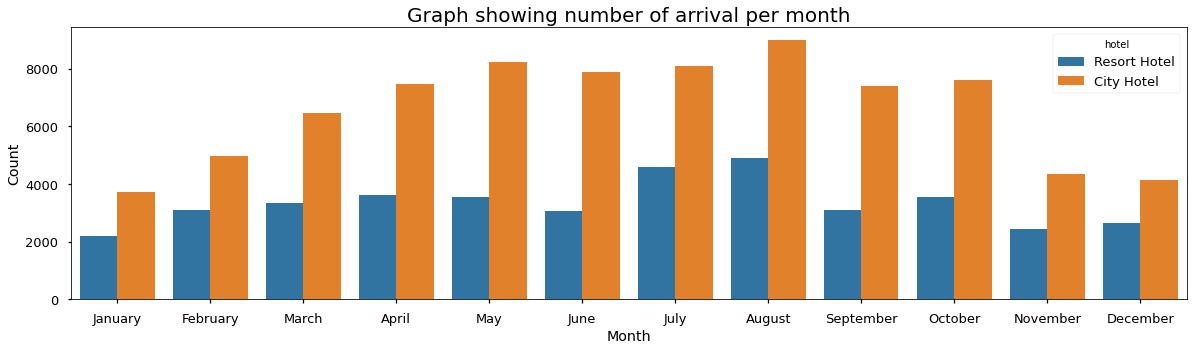

In [11]:
period_arrival = df[['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month']]
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

**So what we see?**


> **we can see that 2016 seems to be the year where hotel booking is at its highest. We also see an increasing trend in booking around the middle of the year, with August being the highest. Summer ends around August, followed straight by autumn. It seems that summer period is a peak period for hotel booking.
We do notice a roller coaster trend for the arrival day of month. **






## `2. From which country most guest come? `

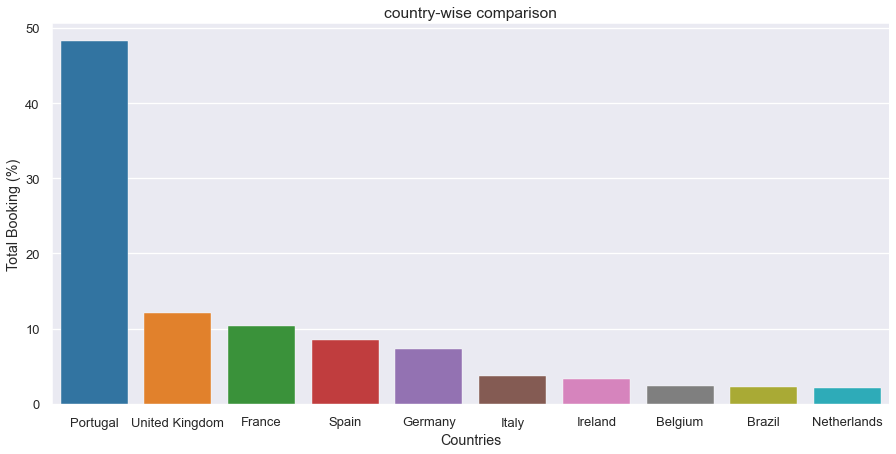

In [12]:
import pycountry as pc

x,y = get_count(df['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))

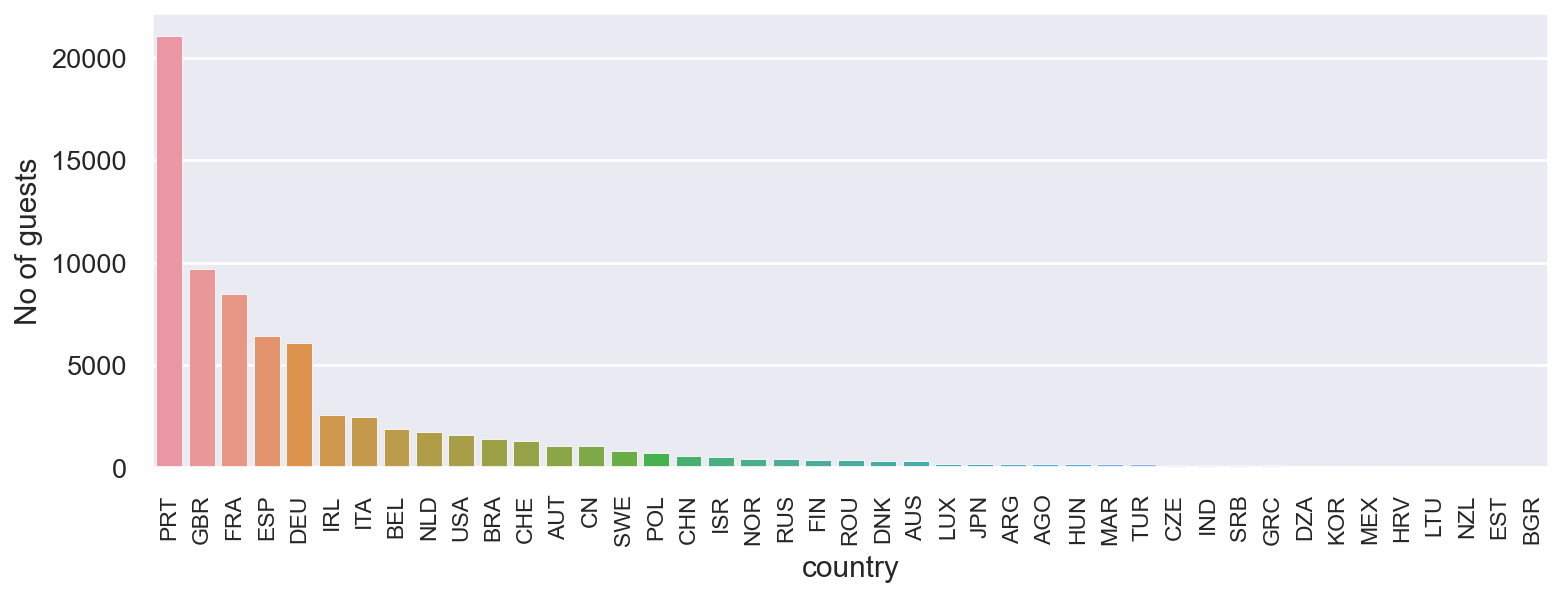

In [13]:
fig = plt.figure(figsize=(12,4), dpi=150)


country_wise_guests = df[(df['is_canceled'] == 0)]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']

country_wise_guests = country_wise_guests[country_wise_guests['No of guests'] > 60]

sns.barplot(data=country_wise_guests, x = 'country', y = 'No of guests')
plt.xticks(rotation=90,fontsize=11);

In [14]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

## ❓ **Null Values and How to Address:**

>* **Children , Country:** drop missing values (75% of the data is zero, making it an easy and accurate choice)
>
>
>
>* **Company , arrival_date_week_number:** Since this feature is 94% empty values, it would have an insignificant impact on the predictions of whether or not a guest will cancel their reservation.
>  * **To address:** I will drop the column as part of the 

In [15]:
df.dropna(subset=['country', 'children'], inplace=True)

In [16]:
df.drop('company', axis=1, inplace=True)
df.drop('arrival_date_week_number', axis=1, inplace=True)

In [17]:
df['agent'] = df['agent'].fillna(0)


<AxesSubplot:>

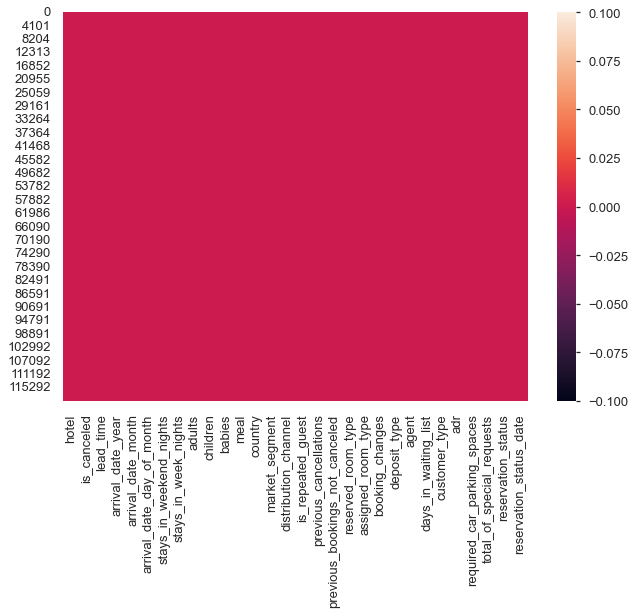

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.isnull().sum().sort_values(ascending=False)[:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
for i in df.columns:
    print(type(df[i].iloc[0]))
    

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>


[Text(0.5, 0, 'is_canceled'),
 Text(1.5, 0, 'lead_time'),
 Text(2.5, 0, 'arrival_date_year'),
 Text(3.5, 0, 'arrival_date_day_of_month'),
 Text(4.5, 0, 'stays_in_weekend_nights'),
 Text(5.5, 0, 'stays_in_week_nights'),
 Text(6.5, 0, 'adults'),
 Text(7.5, 0, 'children'),
 Text(8.5, 0, 'babies'),
 Text(9.5, 0, 'is_repeated_guest'),
 Text(10.5, 0, 'previous_cancellations'),
 Text(11.5, 0, 'previous_bookings_not_canceled'),
 Text(12.5, 0, 'booking_changes'),
 Text(13.5, 0, 'agent'),
 Text(14.5, 0, 'days_in_waiting_list'),
 Text(15.5, 0, 'adr'),
 Text(16.5, 0, 'required_car_parking_spaces'),
 Text(17.5, 0, 'total_of_special_requests')]

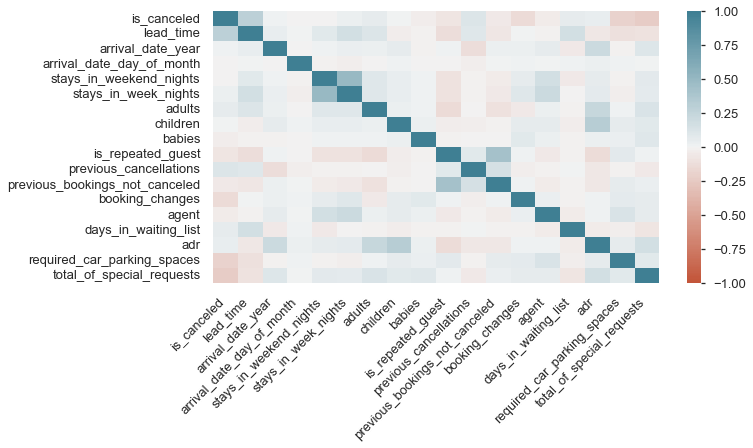

In [22]:
corr = df.corr()

plt.figure(figsize = (10, 5))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, 
                 cmap = sns.diverging_palette(20, 220, n = 200))

ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

## Which is the most busy month for hotel?`

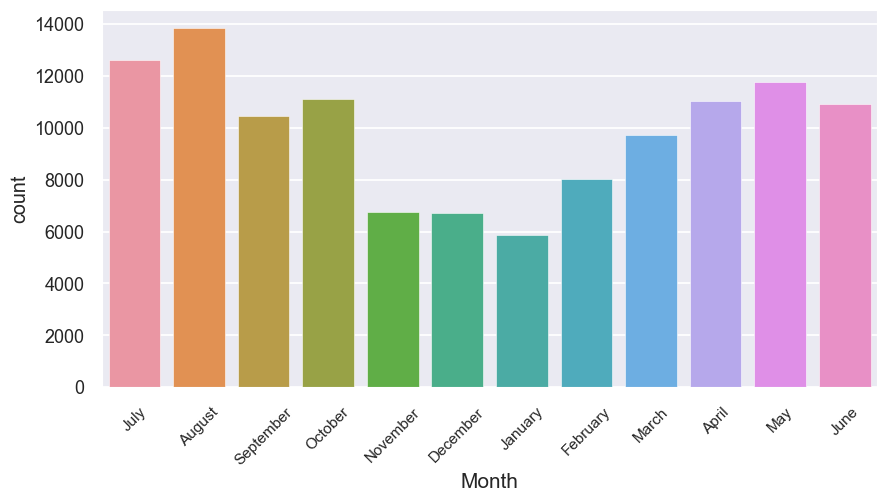

In [23]:
fig = plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=df, x = 'arrival_date_month')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

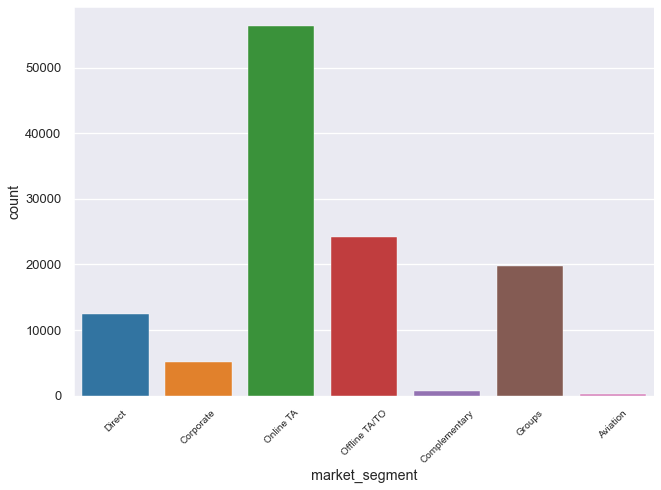

In [24]:
sns.countplot(data=df, x= 'market_segment')
plt.xticks(rotation=45,fontsize=10);

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

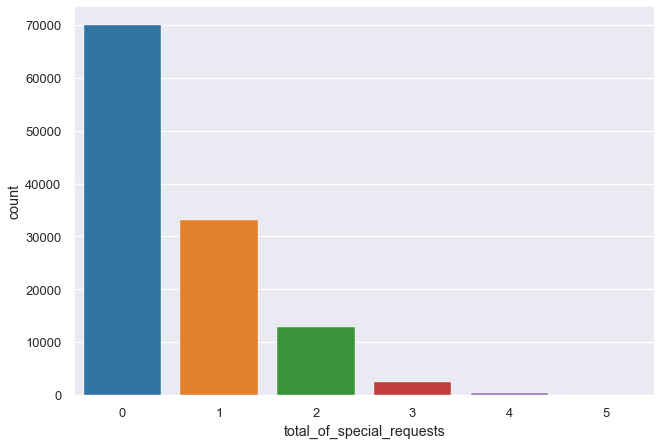

In [25]:
sns.countplot(data=df, x= 'total_of_special_requests')


## Lable encoding (object to int datatype)

In [26]:
df['hotel'] = le.fit_transform(df['hotel'])
df['country'] = le.fit_transform(df['country'])
df['market_segment'] = le.fit_transform(df['market_segment'])
df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'])
df['deposit_type'] = le.fit_transform(df['deposit_type'])
df['customer_type'] = le.fit_transform(df['customer_type'])
df['reservation_status'] = le.fit_transform(df['reservation_status'])
df['meal'] = le.fit_transform(df['meal'])
df['distribution_channel'] = le.fit_transform(df['distribution_channel'])
df['arrival_date_month'] = le.fit_transform(df['arrival_date_month'])

In [27]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,1,0,0,2,0.00,0,0,135,3,1,0,0,0,2,2,3,0,0.00,0,2,0.00,0,0,1,2015-07-01
1,1,0,737,2015,5,1,0,0,2,0.00,0,0,135,3,1,0,0,0,2,2,4,0,0.00,0,2,0.00,0,0,1,2015-07-01
2,1,0,7,2015,5,1,0,1,1,0.00,0,0,59,3,1,0,0,0,0,2,0,0,0.00,0,2,75.00,0,0,1,2015-07-02


In [28]:
dates = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 

In [29]:
df.reservation_status.value_counts()

1    74745
0    42950
2     1203
Name: reservation_status, dtype: int64

<AxesSubplot:xlabel='hotel', ylabel='count'>

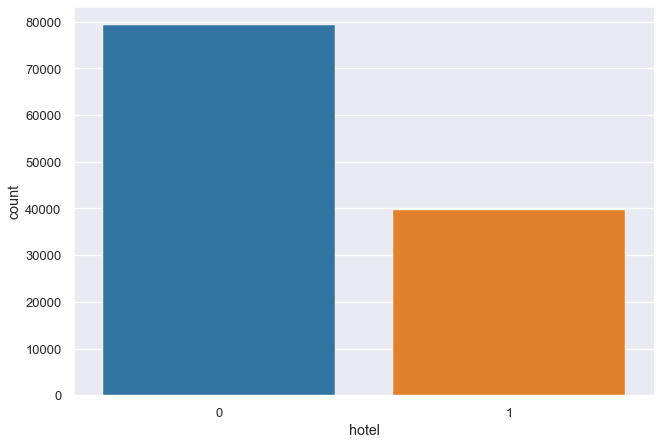

In [30]:
sns.countplot(data=df, x = 'hotel')

<AxesSubplot:xlabel='hotel', ylabel='count'>

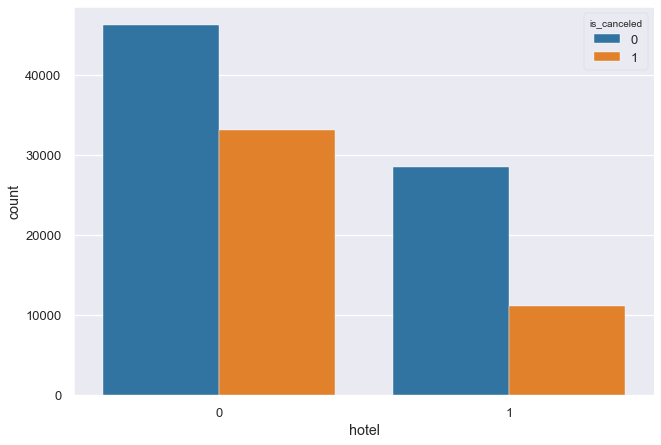

In [31]:
sns.countplot(data=df, x = 'hotel', hue='is_canceled')


### Let's try to answer our questions


## `3. How Many Booking Were Cancelled`

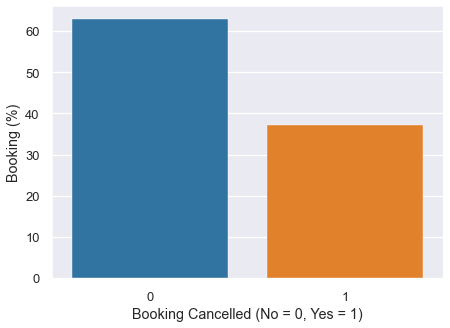

In [32]:
x,y = get_count(df['is_canceled'])
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

#### `For further analysis, Select only those booking which did not get cancelled.`

## `4. What is the booking ratio between Resort Hotel and City Hotel?`


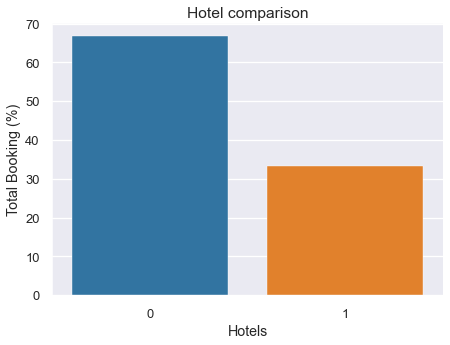

In [33]:
x,y = get_count(df['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

In [34]:
df['reserved_room_type'].unique()


array([2, 0, 3, 4, 6, 5, 7, 8, 1, 9])

## `5. What is the percentage of booking for each year?`

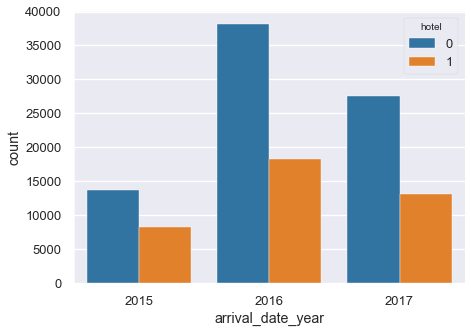

In [35]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df);

In [36]:
df['reserved_room_type'].unique()


array([2, 0, 3, 4, 6, 5, 7, 8, 1, 9])

## `6.'Hotel wise night stay duration (Top 10)?`

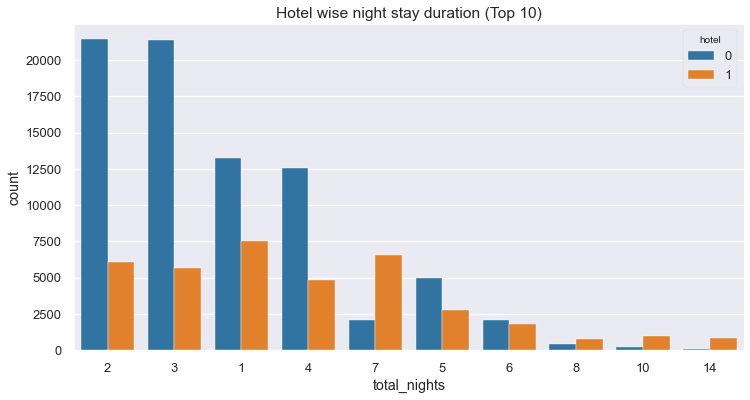

In [37]:
df.loc[:,'total_nights'] = df['stays_in_weekend_nights']+ df['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df,
              order = df.total_nights.value_counts().iloc[:10].index, ax=ax);




> 




* **For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.**
* **For City hotel, most popular stay duration is one, two, seven(week), and three respectively.**








## `7. How Long People Stay in the hotel?`


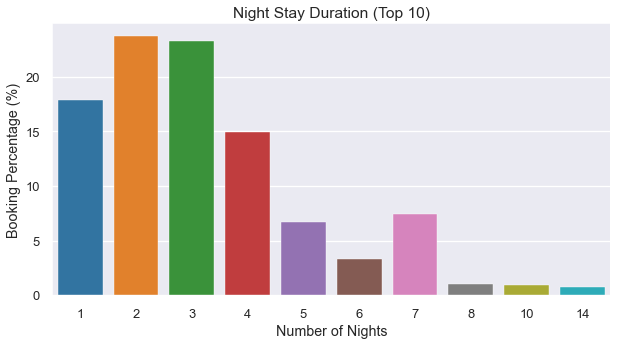

In [38]:
total_nights = df['stays_in_weekend_nights']+ df['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

## `8.Which was the most booked accommodation type (Single, Couple, Family)?`

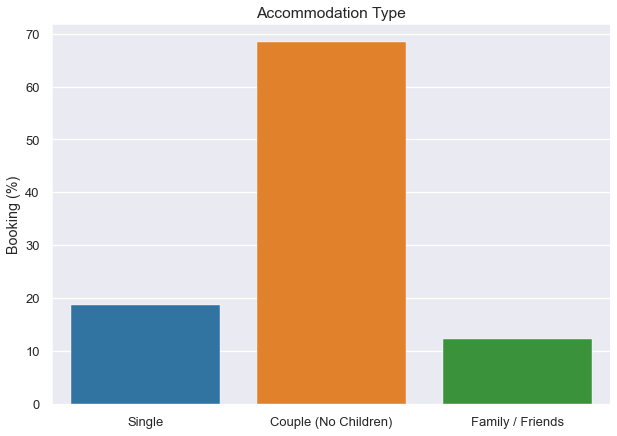

In [39]:
## Select single, couple, multiple adults and family
single   = df[(df.adults==1) & (df.children==0) & (df.babies==0)]
couple   = df[(df.adults==2) & (df.children==0) & (df.babies==0)]
#n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df[df.adults + df.children + df.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))


<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

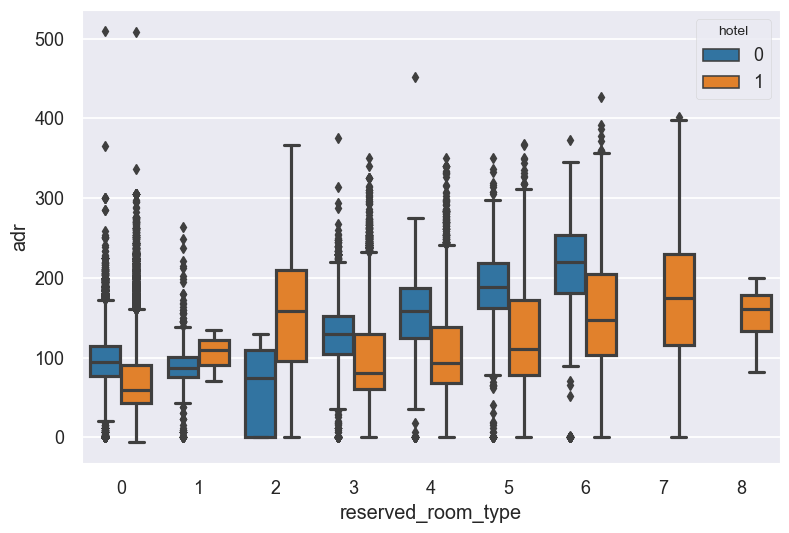

In [40]:
data =df[df['is_canceled'] == 0]
fig = plt.figure(figsize=(9,6), dpi = 100)
sns.boxplot(data= data, x = 'reserved_room_type', y = 'adr', hue = 'hotel')

102.00324252720587


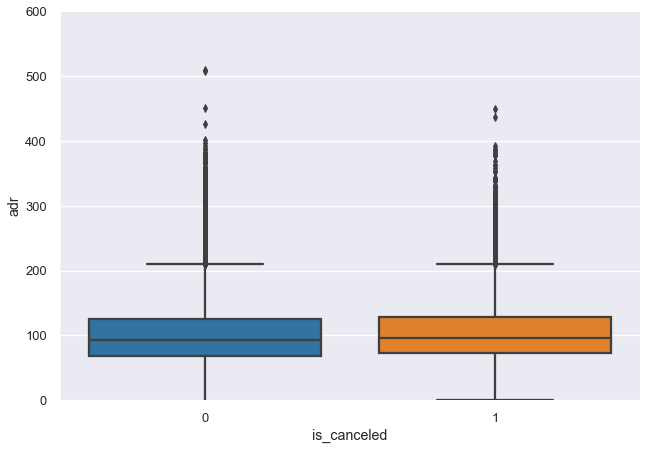

In [41]:
sns.boxplot(data= df,x = 'is_canceled', y='adr')
plt.ylim(0,600)
print(df['adr'].mean())

In [42]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

df.drop(useless_col, axis = 1, inplace = True)

In [43]:
a = df.select_dtypes(object).columns
for i in a:
    print (i, df[i].nunique())

### 1. `Converting Categorical variables to Numerical`

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

In [45]:
a = df.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, df[i].nunique())
    cat_list.append(i)

In [46]:
for i in cat_list:
    df[i] = le.fit_transform(df[i])
df['year'] = le.fit_transform(df['year'])
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_nights,year,month,day
0,1,0,342,1,0,0,2,0.00,0,0,3,1,0,0,0,2,0,0.00,2,0.00,0,0,0,0,0,0
1,1,0,737,1,0,0,2,0.00,0,0,3,1,0,0,0,2,0,0.00,2,0.00,0,0,0,0,0,0
2,1,0,7,1,0,1,1,0.00,0,0,3,1,0,0,0,0,0,0.00,2,75.00,0,0,1,0,0,0
3,1,0,13,1,0,1,1,0.00,0,0,2,0,0,0,0,0,0,304.00,2,75.00,0,0,1,0,0,0
4,1,0,14,1,0,2,2,0.00,0,0,6,3,0,0,0,0,0,240.00,2,98.00,0,1,2,0,0,0


### `2.Train Test Split`

In [48]:
from sklearn.model_selection import train_test_split
y = df['is_canceled']
X = df.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.25)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### `3. Machine Learning Model `

### a) Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)
print(acc_dtc)
print(conf)
print(clf_report)

0.8195794785534062
[[15937  2795]
 [ 2568  8425]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     18732
           1       0.75      0.77      0.76     10993

    accuracy                           0.82     29725
   macro avg       0.81      0.81      0.81     29725
weighted avg       0.82      0.82      0.82     29725



### b) LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [53]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[17917   815]
 [ 5210  5783]]
79.73086627417997


### c) DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [55]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[15952  2780]
 [ 2562  8431]]
82.02859545836839


### d) NaiveBayes

In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predict=nb.predict(X_test)

In [57]:
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[ 2752 15980]
 [  173 10820]]
45.65853658536586


### e) Random Forests

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [59]:
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[17289  1443]
 [ 2643  8350]]
86.25399495374265


### f) SVM Classifier


In [60]:
# from sklearn.svm import SVC
# lin_svc = SVC()
# lin_svc.fit(X_train, y_train)
# lin_svc=rf.predict(X_test)

# lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
# lin_svc_acc_score = accuracy_score(y_test, rf_predict)
# print(lin_svc_conf_matrix)
# print(lin_svc_acc_score*100)

In [61]:
# rbf_svc = SVC(kernel='linear')
# rbf_svc.fit(X_train, y_train)
# rbf_svc=rf.predict(X_test)

# rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
# rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
# print(rbf_svc_conf_matrix)
# print(rbf_svc_acc_score*100)

# pickling the file

In [62]:
# import pickle
# filename='Hotel.pkl'
# pickle.dump(lr,open(filename,"wb"))

In [63]:
a=np.array(y_test)
predicted=np.array(lr.predict(X_test))
df_com=pd.DataFrame({"orignal":a,"predicted":predicted},index=range(len(a)))
df_com.head(50)

,orignal,predicted
0,1,1
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


### `4.Evaluatation of the Model`

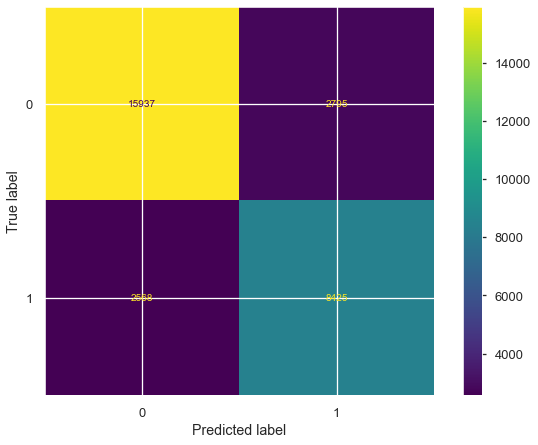

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)

In [65]:
pd.DataFrame(index = X.columns, data = dtc.feature_importances_, 
             columns=['Feature Importance']).sort_values('Feature Importance', ascending = False)

,Feature Importance
deposit_type,0.24
lead_time,0.17
adr,0.13
arrival_date_day_of_month,0.09
total_of_special_requests,0.06
agent,0.05
previous_cancellations,0.04
market_segment,0.04
total_nights,0.04
stays_in_week_nights,0.03


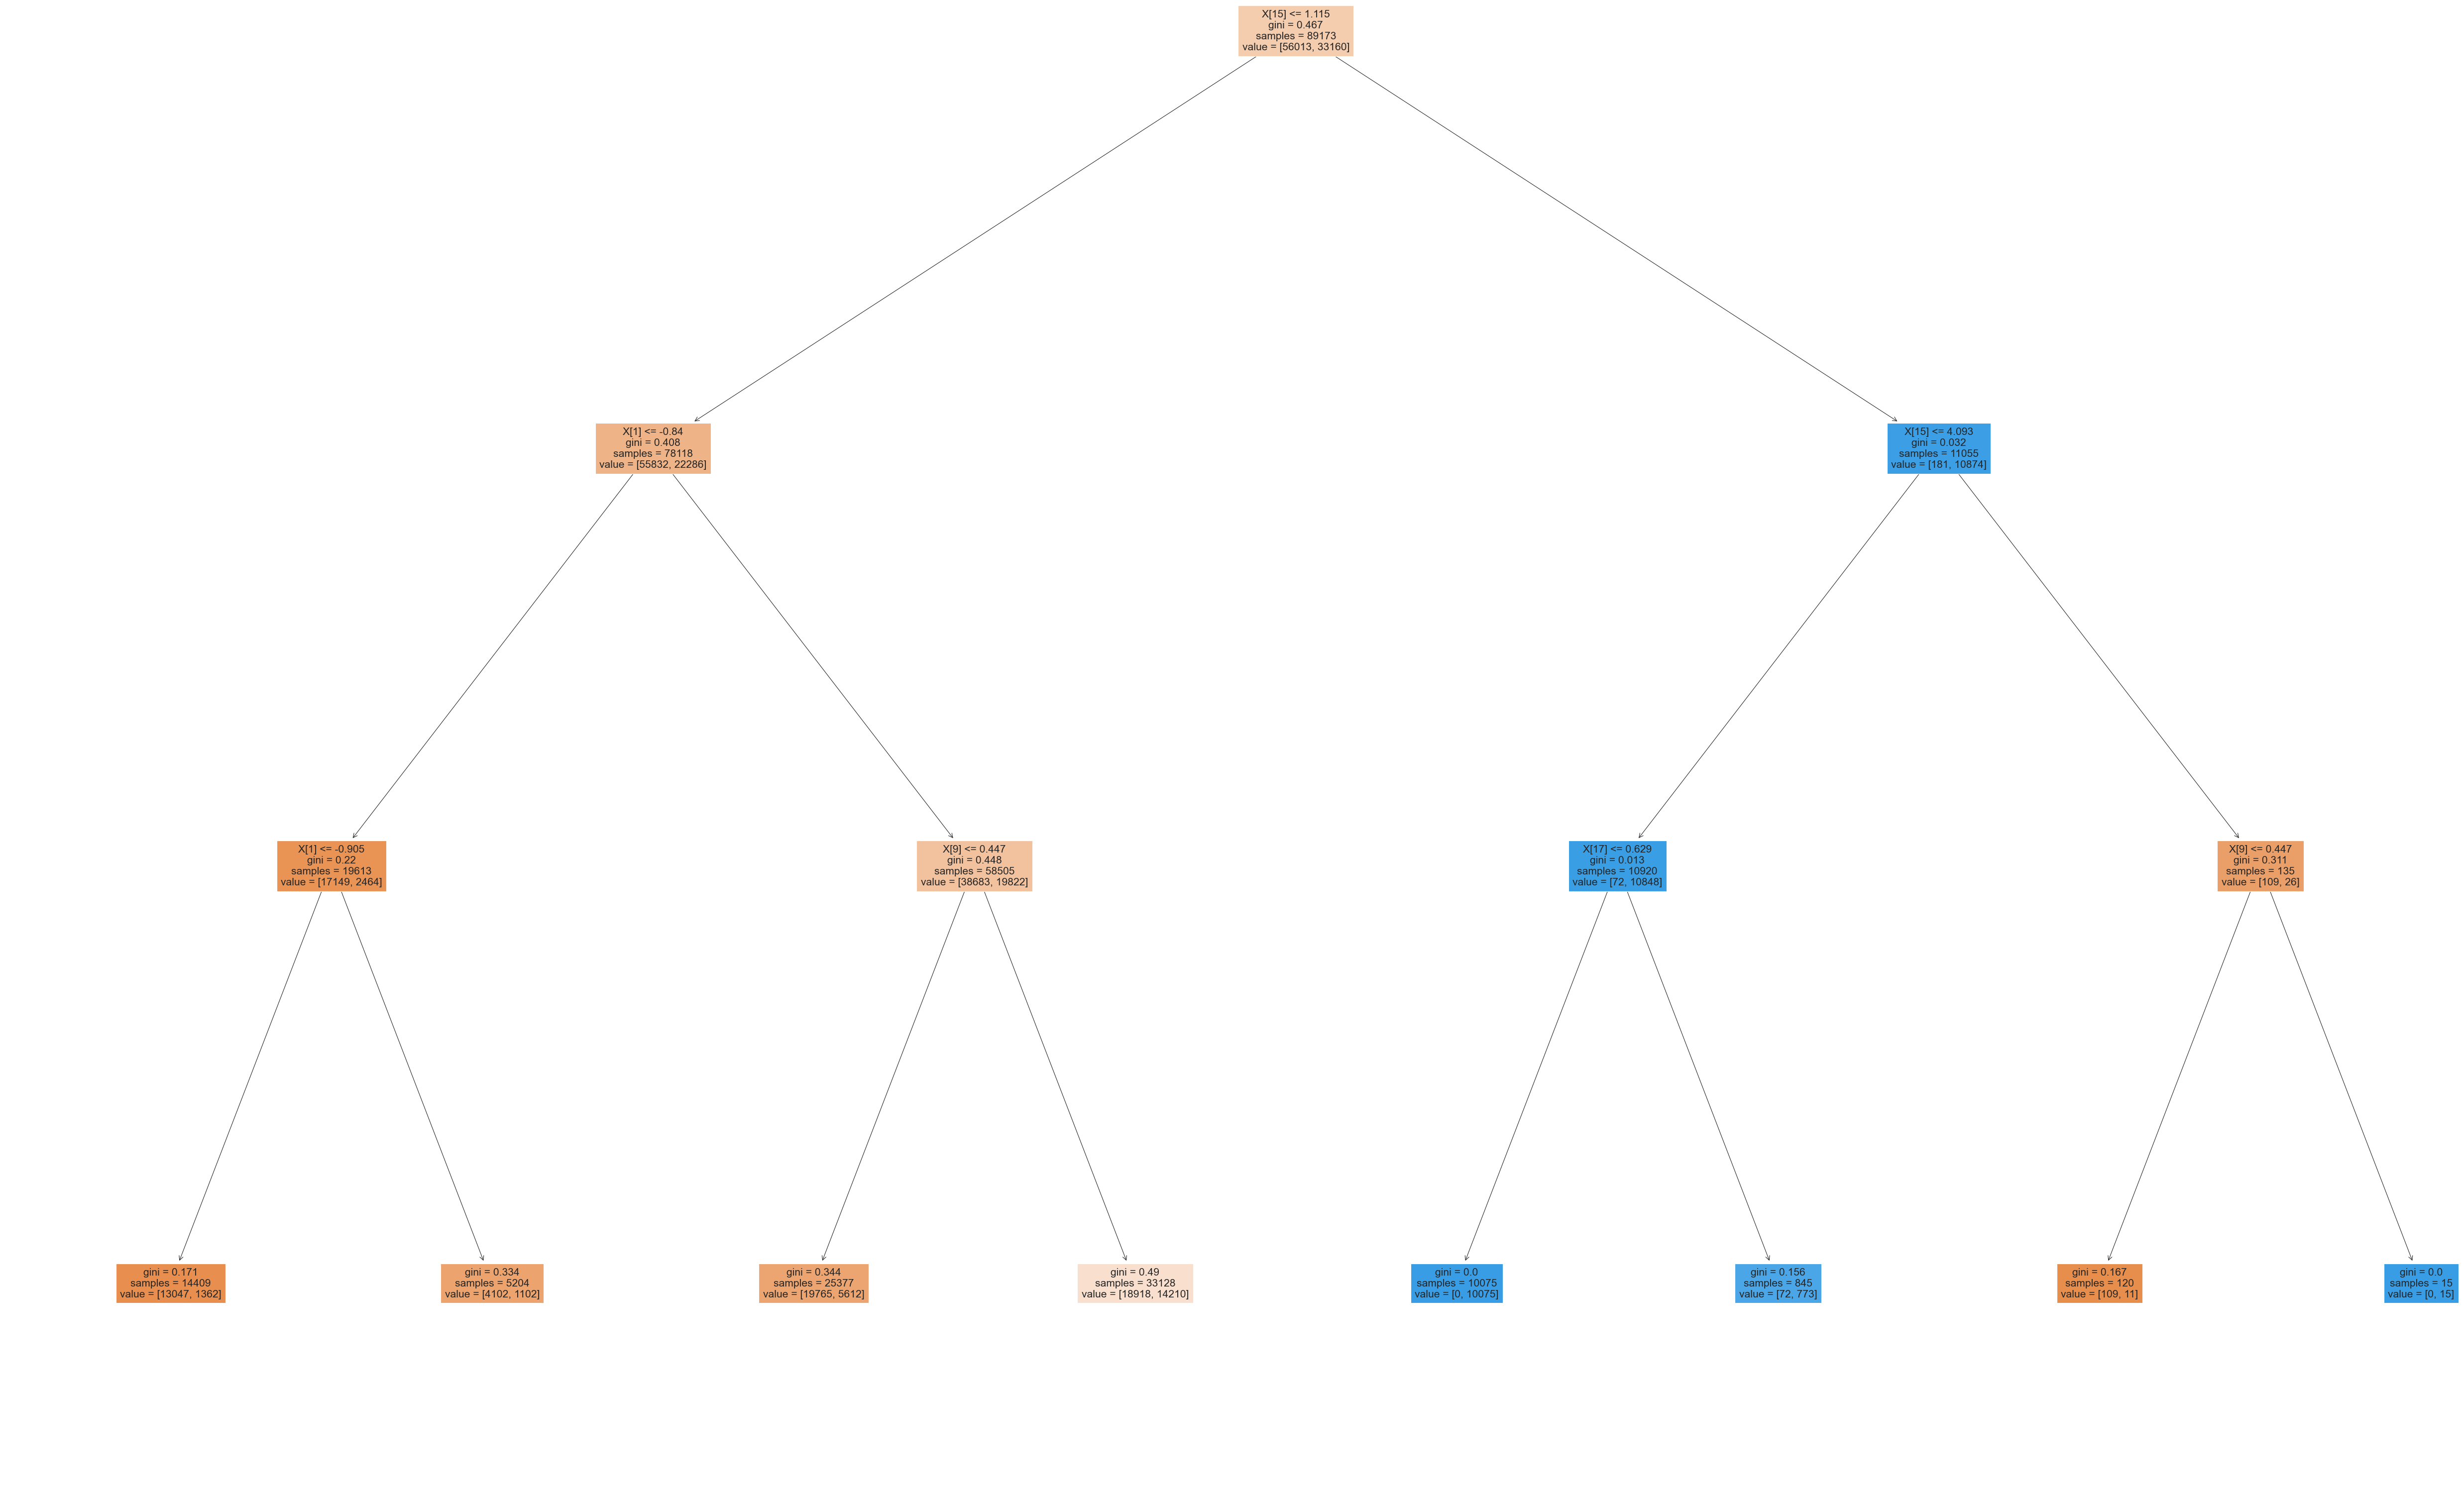

In [66]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8), dpi=200)

pruned_dtc = DecisionTreeClassifier(max_depth=3)
pruned_dtc.fit(X_train, y_train)
y_pred_dtc = pruned_dtc.predict(X_test)

plot_tree(pruned_dtc, filled = True);

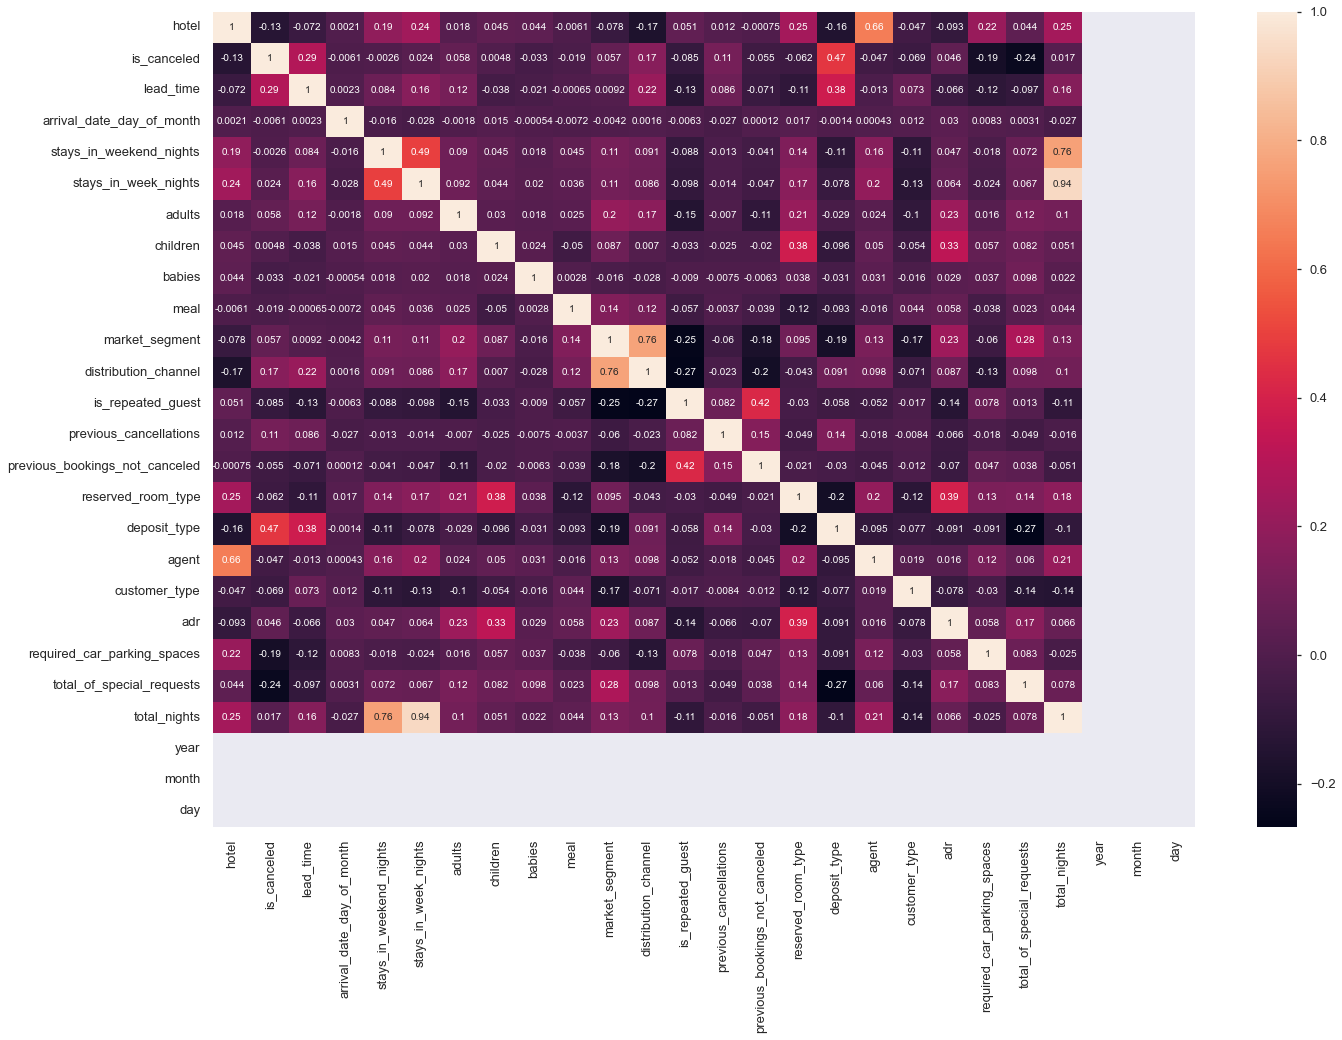

In [67]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df.corr(), annot=True, ax=ax);

Text(0, 0.5, 'Cancellation [%]')

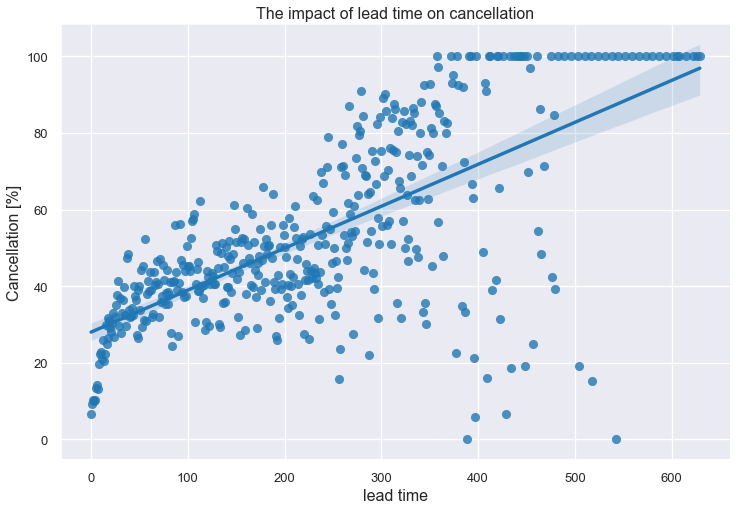

In [68]:
lead_cancel_data = pd.DataFrame(df.groupby("lead_time")["is_canceled"].describe())
# lead_cancel_data
# Select data with lead_time>10 times (data with <10 is not representative)

lead_cancel_data_10 = lead_cancel_data[lead_cancel_data["count"]>10]

y = list(round(lead_cancel_data_10["mean"], 4) * 100)

plt.figure(figsize=(12, 8))
sns.regplot(x=list(lead_cancel_data_10.index),
           y=y)
plt.title("The impact of lead time on cancellation", fontsize=16)
plt.xlabel("lead time", fontsize=16)
plt.ylabel("Cancellation [%]", fontsize=16)

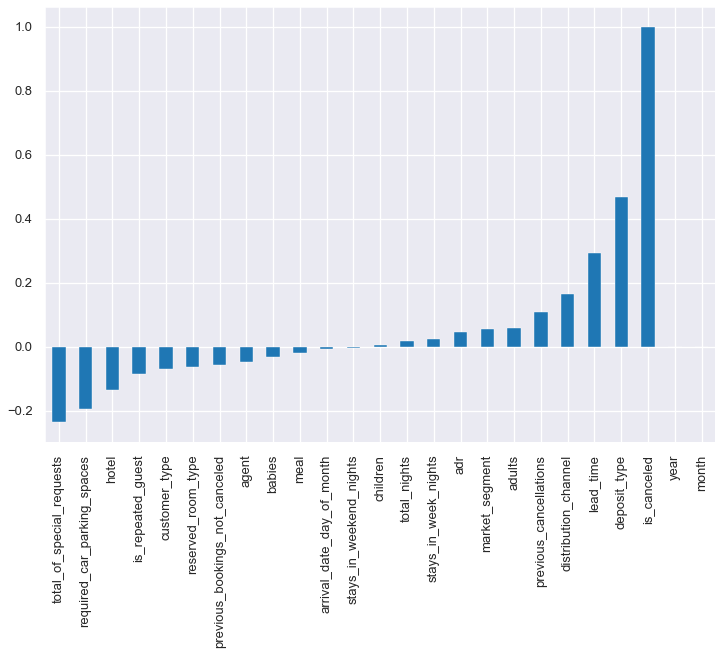

In [69]:

plt.figure(figsize=(12,8))
df.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

# The Accuracy is 86.28%
**We can improve it with some technique**
>* **using log in skewed data** 
> 
>* **Z Score** 
>* **Quantile method (IQR)**
>
>* **Standerd scaler or Normalizer**
> 
>* **Remove duplicate values and columns**
> 
>* **Hyper Parameter Tuning**
> 
>* **Cross Validation** 
> 
>* **Check**
>*1 R2 score 
>*2 F1 score
>*3 Recall

## 6. Conclusion

## Thus the data cleaning, EDA, transformation and modelling has been done successfully!